<a href="https://colab.research.google.com/github/abhijain1216/Airbnb-Bookings-Analysis-EDA/blob/main/Airbnb_Bookings_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Nmae** - Abhinav Jain

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

# **Problem Statement**


Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world.Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers and providers (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

#### **Define Your Business Objective?**

The business's objective in this project is to discover key insights from exploratory data analysis about factors that influence the price of listings and Airbnb bookings in New York, and the results of this information will be useful in making business decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
airbnb = pd.read_csv('/content/drive/MyDrive/Projects/Almabetter EDA Capstone Project/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print('No. of Rows :',airbnb.shape[0])
print('No. of Columns :',airbnb.shape[1])

No. of Rows : 48895
No. of Columns : 16


### Dataset Information

In [7]:
# Dataset Info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_values = airbnb.duplicated().value_counts()  
duplicate_values

False    48895
dtype: int64

There is no duplicate values.All rows are unique.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
missing_values = airbnb.isnull().sum().reset_index().rename(columns = {'index':'column_name',0:'total_missing_values'})
missing_values 

,column_name,total_missing_values
0,id,0
1,name,16
2,host_id,0
3,host_name,21
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


<Axes: >

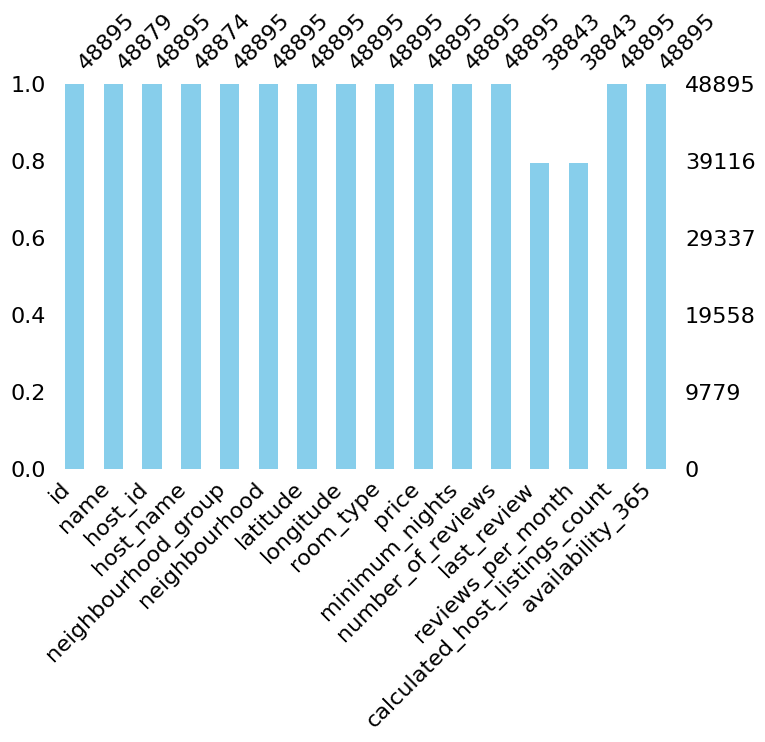

In [10]:
# Visualizing the missing values
msno.bar(airbnb,figsize=(8,5),color = 'skyblue')

### What did you know about your dataset?

* This Airbnb dataset comprising of the bookings made in New York City in 2019.
* This dataset has around 49,000 observations with 16 columns and it includes numerical as well as categorical data.
* This dataset will be helpful for analysing the preferences of customers in terms of locations, room types, and prices across New York which will be used to take business decisions.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

* **id** : Unique listing id
* **name** : Name of the listing
* **host_id** : Unique host id
* **host_name** : Name of the host
* **neighbourhood_group** : Location
* **neighbourhood** : Area fall under neighbourhood group
* **latitude** : Latitude Coordinates
* **longitude** : Longitude Coordinates
* **room_type** : Listing space type
* **price** : Price of listing
* **minimum_nights** : Minimum nights to be paid for
* **number_of_reviews** : Number of reviews given
* **last_review** : Date of last review given
* **reviews_per_month** : Number of reviews per month
* **calculated_host_listings_count** : Amount of Listing per host
* **availability_365** : Number of days when listing is available for booking

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(airbnb.apply(lambda col: col.unique()))

id                                [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...
name                              [Clean & quiet apt home by the park, Skylit Mi...
host_id                           [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...
host_name                         [John, Jennifer, Elisabeth, LisaRoxanne, Laura...
neighbourhood_group               [Brooklyn, Manhattan, Queens, Staten Island, B...
neighbourhood                     [Kensington, Midtown, Harlem, Clinton Hill, Ea...
latitude                          [40.64749, 40.75362, 40.80902, 40.68514, 40.79...
longitude                         [-73.97237, -73.98377, -73.9419, -73.95976, -7...
room_type                              [Private room, Entire home/apt, Shared room]
price                             [149, 225, 150, 89, 80, 200, 60, 79, 135, 85, ...
minimum_nights                    [1, 3, 10, 45, 2, 5, 4, 90, 7, 14, 60, 29, 30,...
number_of_reviews                 [9, 45, 0, 270, 74, 49, 430, 118, 160, 53,

## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [14]:
# Remove unnecessary columns
airbnb.drop(columns = ['last_review','name','id'],inplace = True)

* We have removed some columns from our dataset that are not much important for our analysis
* last_review column has 10052 null values and has less importance than reviews_per_month thats why we have removed last_review column.

In [15]:
# Replace null values for column review_per_month
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

* Here we've replaced nan values with zero because  we are assuming that the rows for which reviews per month are not avaiable, they are actually having zero reviews and this can be a real scenario.

In [16]:
# Replace null values for host_name with 'unknown'
airbnb['host_name'].fillna('Unknown',inplace=True)

In [17]:
# After replacing all the  null values let's check dataframe info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

* Now, there are no null values or missing values 

In [18]:
# let's have a look at statistical description of numerical columns of dataset
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* From the above stastical description it is clear  that there is a flaw for price column that is, the minimum price is zero which is not possible. So we will going to replace min price with the average of prices that are less than 100 (i.e approximately less than 50 percentile value).

* From description it is also clear that columns like price,minimum_nights,number_of_reviews, reviews_per_month are having outliers.

In [19]:
# Replace the minimum price with average of price less than 100
min_avg_price = round(airbnb.loc[airbnb['price'] < 100,'price'].mean())
airbnb.loc[airbnb['price']==0,'price'] = min_avg_price

In [20]:
# Let's check price description 
airbnb.price.describe()

count    48895.000000
mean       152.735310
std        240.146849
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [21]:
# Numerical and Categorical Features
numerical_features = []
categorical_features = []
for column in list(airbnb.columns):
    if (airbnb[column].dtype) !='object':
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Numerical Features:',numerical_features)
print('\n')
print('Categorical Features:',categorical_features)

Numerical Features: ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Categorical Features: ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


### What all manipulations have you done and insights you found?

* Removed unwanted columns that have no relevance in the current EDA analysis from the dataframe.
* Replaced all the missing values/null values with relevant values.
* Replaced the minimum price for listing, which was zero previously, with the mean of the prices that are less than 100.
* It is obvious from the statistical description of numerical columns that some of the columns, such as price, minimum_nights, number_of_reviews, and reviews_per_month, have outliers. 
* Created Variable for numerical and categorical features.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate Analysis

#### Chart - 1

Distribution of numerical columns

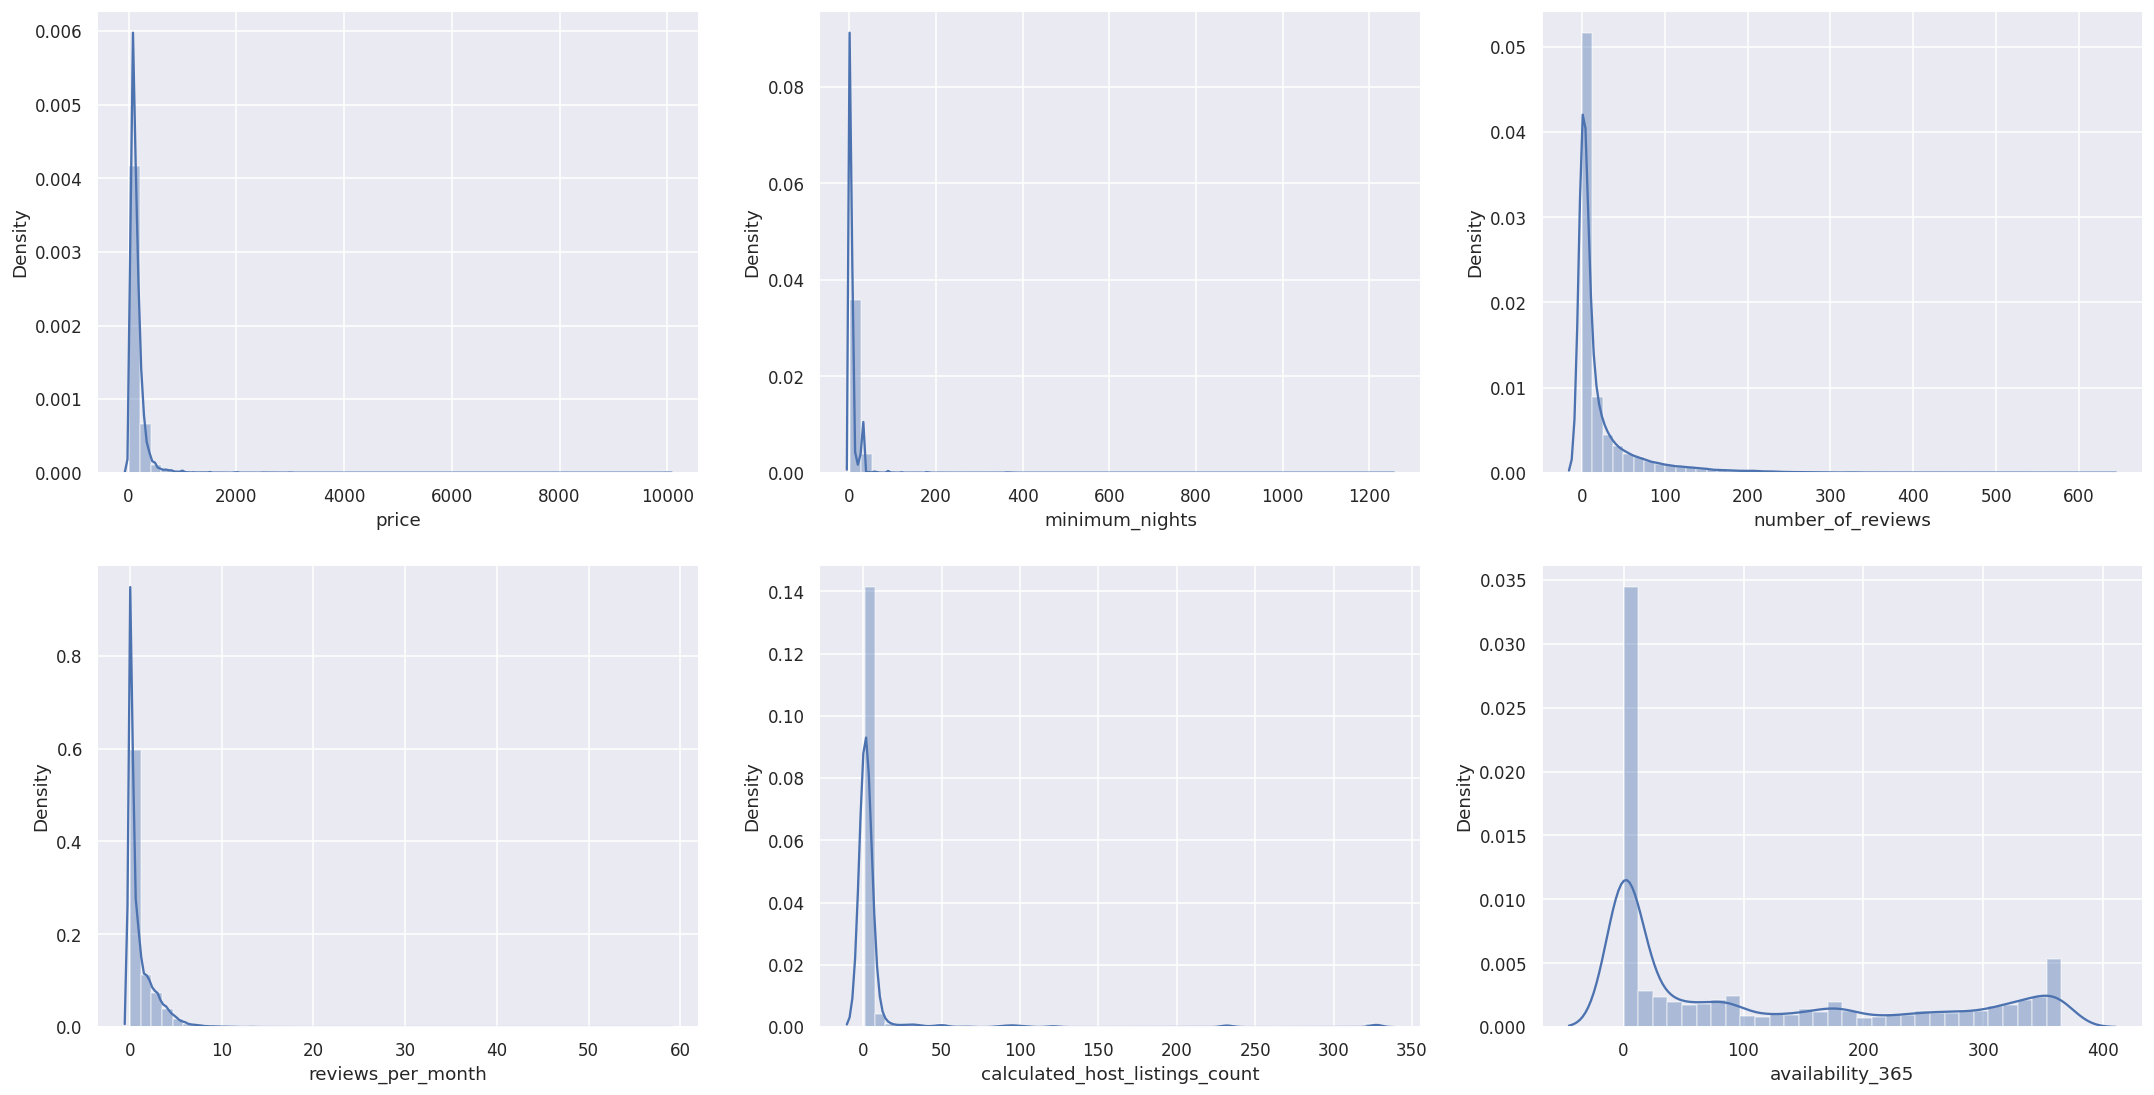

In [22]:
# Chart - 1 visualization code
# Create a new variable for numerical features by removing columns like 'host_id', 'latitude', 'longitude' 
num_features = [feature for feature in numerical_features if feature not in ['host_id', 'latitude', 'longitude']]

# Visulization
sns.set_theme()
fig,axes = plt.subplots(nrows=2, ncols=3,figsize = (24,12),dpi = 110)
for feature,axes in zip(num_features,axes.ravel()):
    sns.distplot(airbnb[feature],ax = axes)
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plots plot a univariate distribution of data and are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).That's why, to find some insights about numerical columns, a distribution plot is used.

##### 2. What is/are the insight(s) found from the chart?

* According to the distribution of numerical columns, all of the features have a positively skewed distribution, with the exception of the availability column, which distributed uniformly throughout the year. 

* The price column contains outliers, but we can't simply remove them because the reason for these outliers may be the location and type of room that justifies the price.

#### Chart - 2

Total Number of Listings For Each Neighbourhood Groups

In [23]:
# Chart - 2 visualization code

# Dataframe for Total listing count at each neighbourhood
Neighbourhood_df = airbnb['neighbourhood_group'].value_counts().reset_index().rename(columns = {'index':'neighbourhood_group','neighbourhood_group':'total_listings'})
Neighbourhood_df

,neighbourhood_group,total_listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


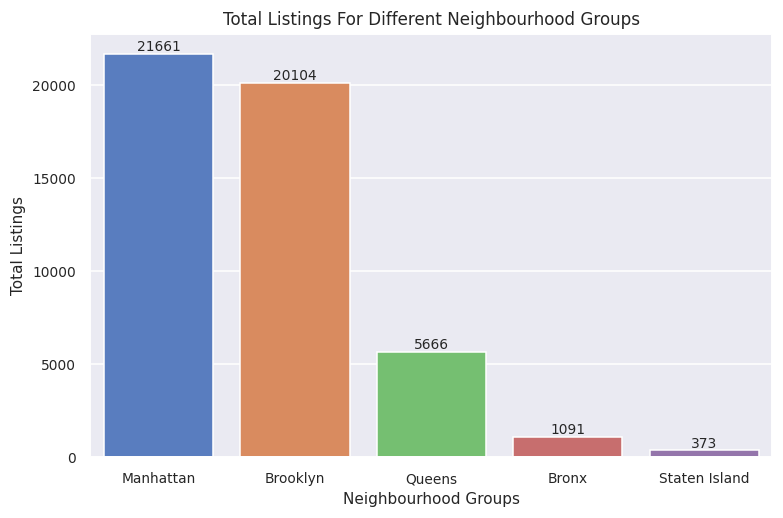

In [24]:
# Visualiztion using bar plot
plt.figure(figsize = (8,5),dpi = 110)
plot = sns.barplot(data = Neighbourhood_df , x = 'neighbourhood_group',y = 'total_listings',palette = 'muted')
plt.bar_label(plot.containers[0], label_type='edge',size = 9)
plt.title('Total Listings For Different Neighbourhood Groups',fontsize=11)
plt.ylabel('Total Listings',fontsize=10)
plt.xlabel('Neighbourhood Groups',fontsize=10)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

##### 1. Why did you pick the specific chart?

Here a bar chart is used because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan and Brooklyn have the most listings, with over 20,000 each, compared to other neighbourhood groups.
* Staten Island has only 373 listings and hence stands last in the list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Despite having a larger geographical area than Manhattan and Brooklyn, Queens has very few listings. So, increasing the number of listings in Queen may result in positive business growth.

#### Chart - 3

Top Neighbourhoods According To Listing Counts

In [25]:
# Chart - 3 visualization code

# Dataframe of top neighbourhoods
top_neighbourhood = airbnb['neighbourhood'].value_counts().reset_index().rename(columns = {'index':'neighbourhood','neighbourhood':'listing_count'})
top_neighbourhood

,neighbourhood,listing_count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


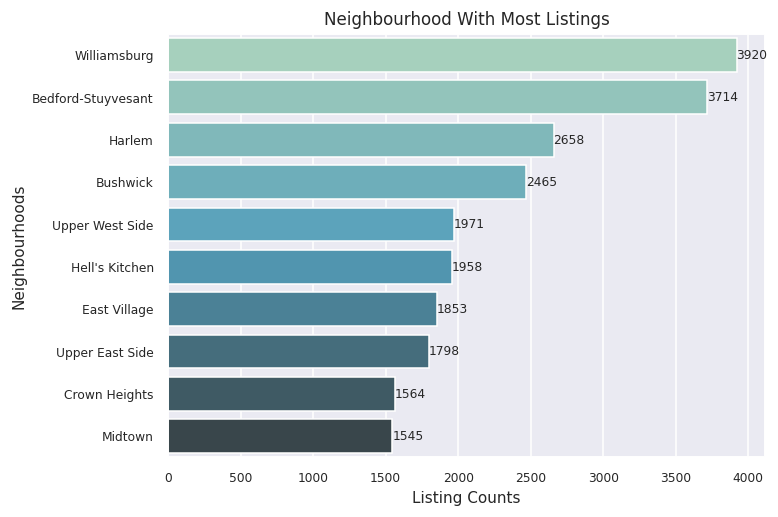

In [26]:
# Visualiztion using bar plot
plt.figure(figsize = (7,5),dpi = 110)
plot = sns.barplot(data = top_neighbourhood[:10],x = 'listing_count',y = 'neighbourhood',palette='GnBu_d' )
plt.bar_label(plot.containers[0], label_type='edge',size = 8)
plt.title('Neighbourhood With Most Listings',fontsize=11)
plt.ylabel('Neighbourhoods',fontsize=10)
plt.yticks(fontsize=8)
plt.xlabel('Listing Counts',fontsize=10)
plt.xticks(fontsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

Here, a horizontal bar chart is used instead of a vertical bar chart because a vertical bar chart lacks space for text labeling when category labels are more in numbers and a horizontal bar chart is better for displaying information. So I used a horizontal bar chart to display the count of neighbourhood listings.

##### 2. What is/are the insight(s) found from the chart?

* Williamsburg and Bedford are the two top neighbourhoods with the most listings in NYC.
* Next on the list are Harlem, Bushwick and Upper West Side, which are also quite popular in NYC.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help in analysing the number of listings across neighbourhoods, and from this information we can infer about the most popular neighbourhoods in New York and also get an idea of customer preference for neighbourhoods when making bookings on AirBnB.

#### Chart - 4

Hosts With The Most Listings In NYC

In [27]:
# Chart - 4 visualization code

# Dataframe for Hosts having maximum listing
host_listing_df = airbnb[['host_id','host_name']].value_counts().sort_values(ascending = False).reset_index().rename(columns = {0:'total_listing_count'})

# Let's check top 10 
host_listing_df[:10]

,host_id,host_name,total_listing_count
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,16098958,Jeremy & Laura,96
5,12243051,Sonder,96
6,61391963,Corporate Housing,91
7,22541573,Ken,87
8,200380610,Pranjal,65
9,1475015,Mike,52


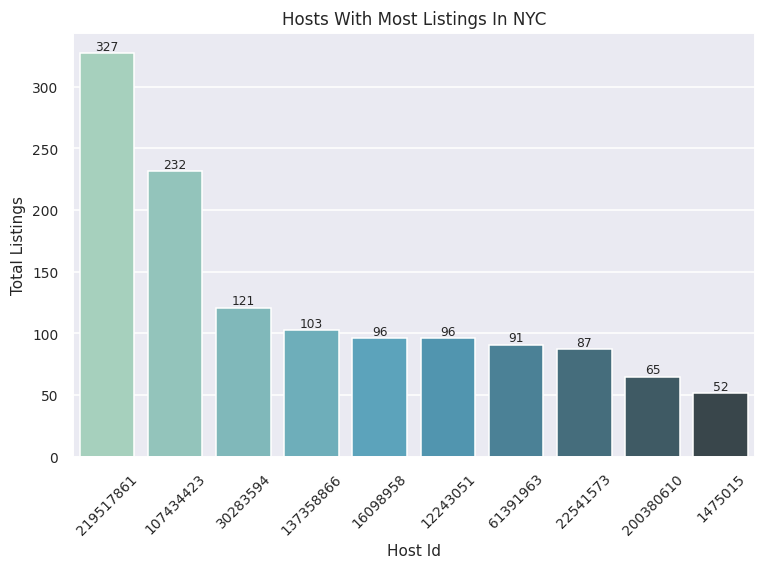

In [28]:
# Visualization using bar plot
plt.figure(figsize = (8,5),dpi = 110)
plot = sns.barplot(data = host_listing_df[:10],x = 'host_id',y = 'total_listing_count',palette='GnBu_d',order =  host_listing_df[:10].sort_values('total_listing_count',ascending = False).host_id)
plt.title('Hosts With Most Listings In NYC',fontsize=11)
plt.bar_label(plot.containers[0], label_type='edge',size = 8)
plt.ylabel('Total Listings',fontsize=10)
plt.xlabel('Host Id',fontsize=10)
plt.xticks(rotation = 45,fontsize = 9)
plt.yticks(fontsize = 9)
plt.show()

##### 1. Why did you pick the specific chart?

Here, a bar chart is used because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Sonder(Host id- 219517861) has the most listings in New York with a count of 327.
* Except for the top four hosts, all other hosts have fewer than 100 listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights from the above chart give information about hosts and their property counts,which helps in analysing the distribution of hosts,which is an important factor when trying to grow business in less popular areas.

#### Chart - 5

Proportion of Different Room Types Across NYC


In [29]:
# Chart - 5 visualization code

# Dataframe for room proportion acroos NYC
room_proportion = airbnb['room_type'].value_counts().reset_index().rename(columns = {'index':'room_type','room_type':'total_count'})
room_proportion

,room_type,total_count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


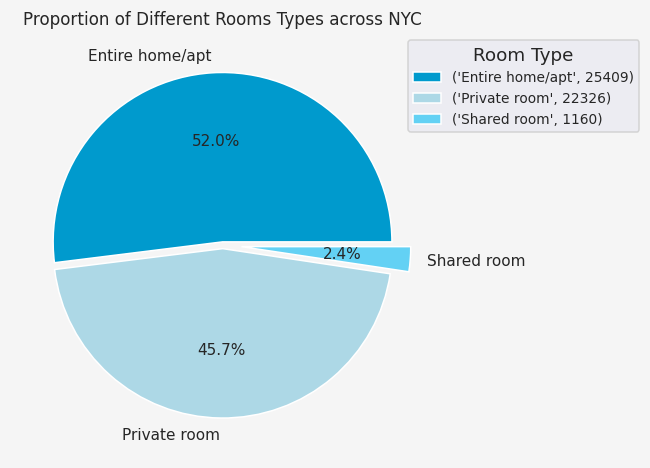

In [30]:
# Visualization using Pie Plot

plot_labels = tuple(zip(room_proportion['room_type'],room_proportion['total_count']))
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4']
plt.figure(figsize = (5,5),dpi = 110,facecolor = 'whitesmoke')
plt.pie(room_proportion['total_count'],labels=room_proportion.room_type.values,colors = color_palette_list,textprops = {'size': 'small'},autopct='%1.1f%%',explode = [0.02,0.02,.11])
plt.legend(title='Room Type', bbox_to_anchor=(1, 0, 0.5, 1), fontsize='9',labels = plot_labels)
plt.title('Proportion of Different Rooms Types across NYC',fontsize=11)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used. So here, a pie chart is used to visualise the proportion of rooms across NYC.

##### 2. What is/are the insight(s) found from the chart?

* Out of all the rooms that are available in New York, over 97 percent are Entire Homes or Private Rooms.
* Shared rooms are less preferred in NYC, and only 1160 shared rooms are available in the entire area.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Almost 97 percent of rooms are Home apartments or Private rooms, and the rest are shared rooms. But we simply can't ignore the 2.5 percent of shared rooms because there are still some people who prefer shared rooms. These insights help in predicting the preferences of customers in terms of rooms.



#### Chart - 6

Price Distribution Across Different Neighbourhoods 

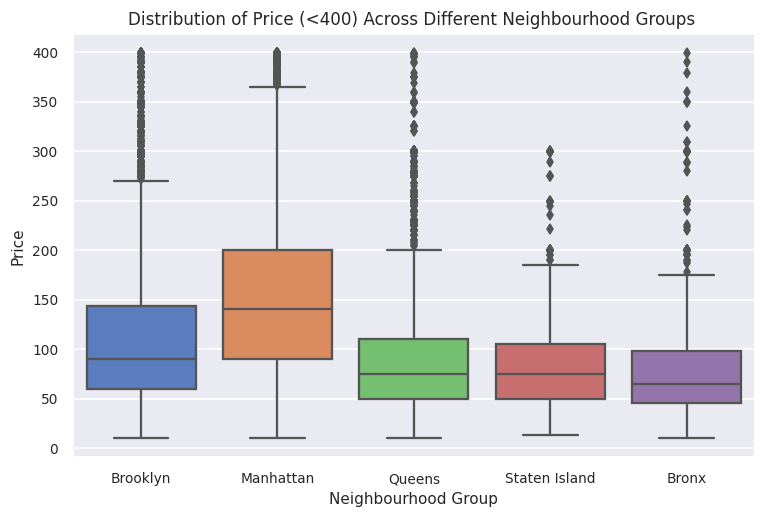

In [31]:
# Chart - 6 visualization code
plt.figure(figsize = (8,5),dpi = 110)
sns.boxplot(data = airbnb[airbnb.price<400],x = 'neighbourhood_group',y = 'price',palette = 'muted')
plt.title("Distribution of Price (<400) Across Different Neighbourhood Groups ",fontsize=11)
plt.xlabel('Neighbourhood Group',fontsize=10)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
plt.ylabel('Price',fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

A whisker plot also called a box plot , displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. Thus, for the visualisation of these five statistical measures of the price variable, a box plot is used.

##### 2. What is/are the insight(s) found from the chart?

* Most of the price lies in the range of 0–400 dollars.
* Manhattan and Brooklyn have higher ranges of price than other neighbourhoodgroup.
* Manhattan is the most expensive neighbourhood group for accommodations.
* The Bronx has the lowest price ranges among the neighbourhood groups.
* Staten Island and Queens are within a comparable pricing range.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Prices above 400 dollars are very unevenly distributed and have the highest value up to 10,000 dollars,may be this is because of the fact that the rooms are very luxurious or because demand is very high in that area, but price is an important factor when making a booking, so focusing more on high prices from the perspective of business growth may help in generating high revenue.

#### Chart - 7

Mean Prices For Different Neighbourhood Groups and Room Types

In [32]:
# Chart - 7 visualization code

# Data Frame for mean price across Neighbourhood Groups
price_df = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
price_df = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
price_df = price_df.rename(columns = {'neighbourhood_group':'location','price':'mean_price'})
price_df['mean_price'] = price_df['mean_price'].apply(lambda x: round(x))
price_df['mean_price'] = price_df['mean_price'].astype(int)
price_df

,location,room_type,mean_price
0,Bronx,Entire home/apt,128
1,Bronx,Private room,67
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,178
4,Brooklyn,Private room,77
5,Brooklyn,Shared room,51
6,Manhattan,Entire home/apt,249
7,Manhattan,Private room,117
8,Manhattan,Shared room,89
9,Queens,Entire home/apt,147


In [33]:
# Dataframe for prices of different room types
room_price_df = airbnb.groupby('room_type')['price'].mean().reset_index().rename(columns = {'price':'mean_price'})
room_price_df ['mean_price'] = room_price_df['mean_price'].apply(lambda x: round(x)).astype(int)
room_price_df

,room_type,mean_price
0,Entire home/apt,212
1,Private room,90
2,Shared room,70


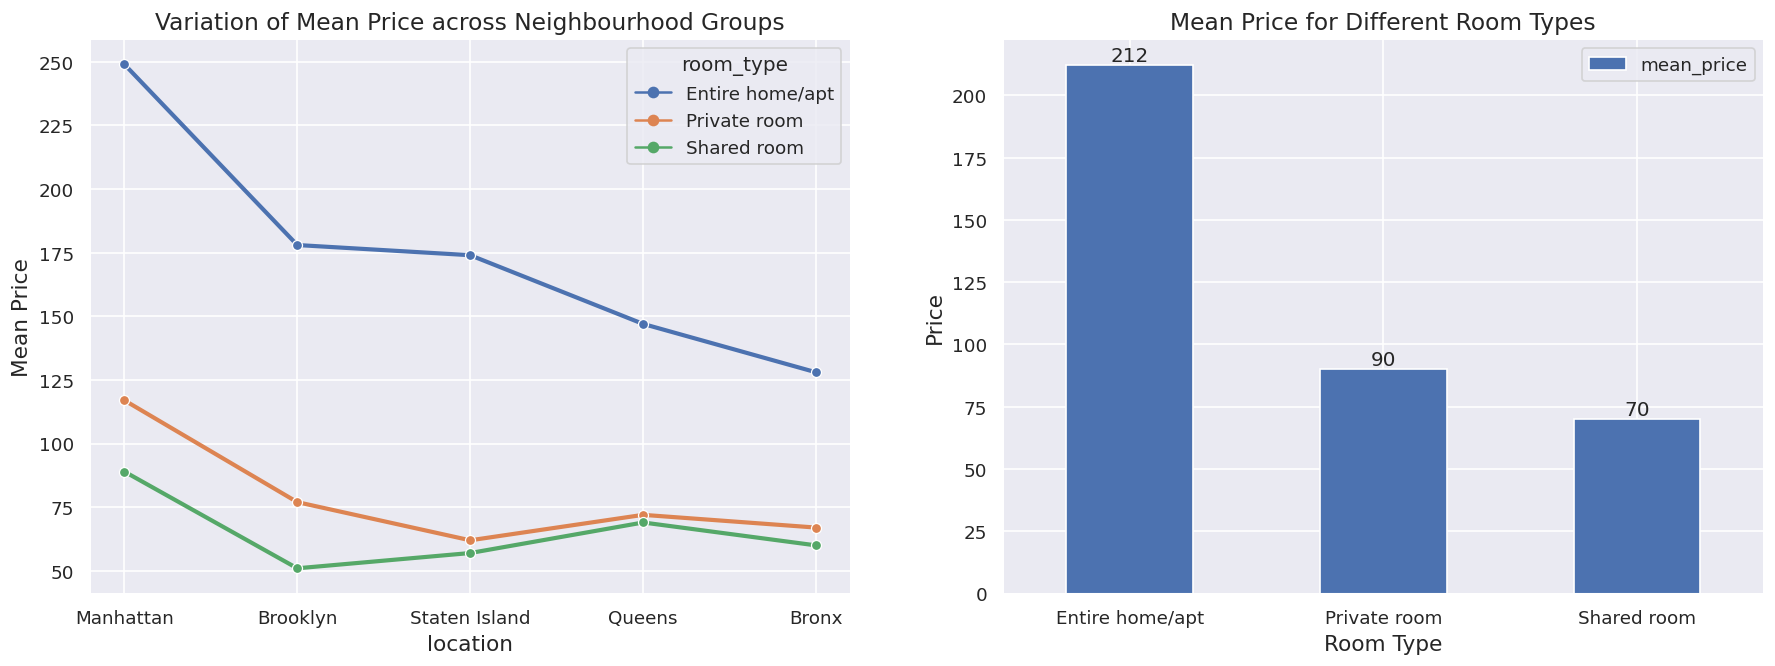

In [34]:
# Visualization

# Visualization of Mean Price across Neighbourhood Groups
fig,ax = plt.subplots(1,2,figsize = (18,6),dpi = 120)
sns.lineplot(data=price_df.sort_values('mean_price',ascending = False),x='location', y ='mean_price', hue='room_type',style='room_type',markers=["o", "o","o"],dashes=False,lw = 2.5,ax = ax[0])
ax[0].set_xlabel('location', fontsize=13);
ax[0].set_ylabel('Mean Price', fontsize=13);
ax[0].set_title('Variation of Mean Price across Neighbourhood Groups', fontsize=14)


# Visualization of Mean Price for Different Room Types
room_price_df.plot(x = 'room_type',y='mean_price',kind = 'bar',ax = ax[1])
ax[1].bar_label(ax[1].containers[0], label_type='edge')
ax[1].set_title("Mean Price for Different Room Types",fontsize=14)
ax[1].set_xlabel('Room Type',fontsize=13)
ax[1].set_ylabel('Price',fontsize=13)
ax[1].set_xticklabels(labels = room_price_df['room_type'].values,rotation = 0)
plt.show()

##### 1. Why did you pick the specific chart?

* A line chart is used because line charts are used to represent the relation between two variables (X and Y) on a different axis, and in our case we also have two variables (review and location).

* Secondly,a Bar chart is used because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan is the most expensive neighbourhood for all kinds of room types. Manhattan's average price for entire apartments is 250 dollar, which is very high in comparison to other cities.
* For Entire apartments and Private Rooms,Brooklyn has the second-highest prices after Manhattan.
* For Entire homes and apartments, the Bronx is the cheapest one.
* For private and shared rooms, Bronx and Staten Island have almost equal prices.
* Entire homes are more expensive than private and shared rooms, with a mean price of around 200 dollars, and shared rooms are the cheapest.
* Private and shared rooms have average prices of less than 100 dollars.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Manhattan is very expensive, and the reason may be that either the demand is very high or the room availability is low, so from a business point of view, Manhattan is a good place to start if a company wants to grow its business in New York. These price patterns will help the business in determining the price of new listings and also help in understanding the customer's choice of price range while using AirBnB service.


#### Chart - 8

Top Most Expensive Neighbourhoods

In [35]:
# Chart - 8 visualization code

# Dataframe for neighbourhood price
neighbourhood_price = airbnb.groupby('neighbourhood',as_index = False)['price'].mean().sort_values('price',ascending = False).rename(columns = {'price':'mean_price'}).reset_index(drop = True)
neighbourhood_price[:15]

,neighbourhood,mean_price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Tribeca,490.638418
3,Sea Gate,487.857143
4,Riverdale,442.090909
5,Prince's Bay,409.500000
6,Battery Park City,367.557143
7,Flatiron District,341.925000
8,Randall Manor,336.000000
9,NoHo,295.717949


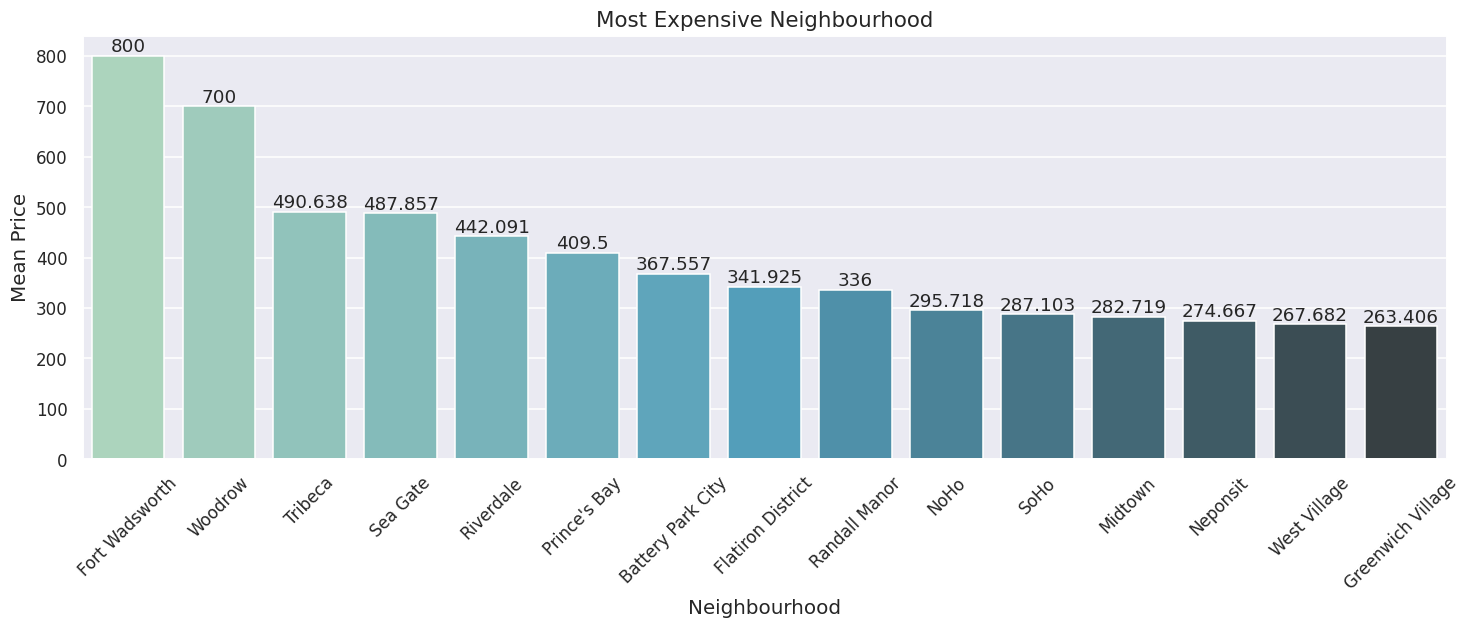

In [36]:
# Visualization 

plt.figure(figsize = (16,5),dpi = 110)
plot = sns.barplot(data = neighbourhood_price[:15],x = 'neighbourhood',y = 'mean_price',palette='GnBu_d')
plt.title('Most Expensive Neighbourhood',fontsize=14)
plt.bar_label(plot.containers[0], label_type='edge')
plt.ylabel('Mean Price',fontsize=13)
plt.xlabel('Neighbourhood',fontsize=13)
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

Here,a bar chart is used because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* The bar chart shows the top 15 most expensive neighbourhoods based on mean price, with all of them having a price higher than 200 dollars.
* Fort Wadsworth is the most expensive one, with a mean price of around 800 dollars.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above information can be helpful for categorising neighbourhoods based on prices and for analysing the maximum price distribution across neighbourhoods, which will provide a statistical overview of pricing in various locations.

#### Chart - 9

Total Number of Hosts In Each Neighbourhood Group


In [37]:
# Chart - 9 visualization code

# Dataframe for hosts count
hosts_count = airbnb[['neighbourhood_group','host_id']].drop_duplicates().groupby(['neighbourhood_group']).count().sort_values('host_id',ascending = False).reset_index().rename(columns = {'neighbourhood_group':'location','host_id':'hosts_count'})
hosts_count


,location,hosts_count
0,Manhattan,16578
1,Brooklyn,15966
2,Queens,3983
3,Bronx,789
4,Staten Island,256


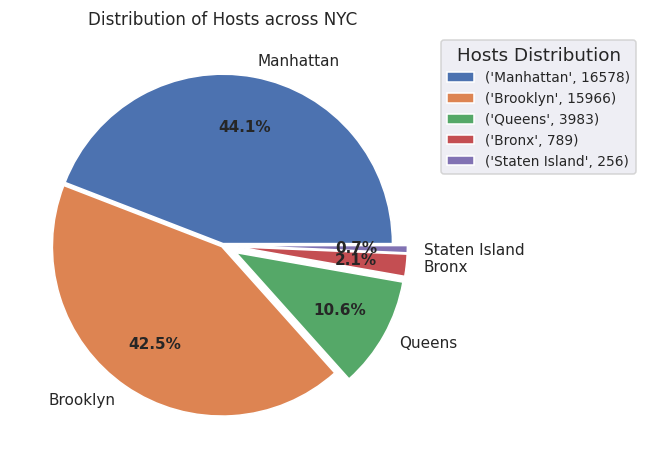

In [38]:
# visualization uaing pie chart
plot_labels = tuple(zip(hosts_count['location'],hosts_count['hosts_count']))
plt.figure(figsize = (5,5),dpi = 110)
wedges, texts,autotexts  = plt.pie(hosts_count['hosts_count'],textprops = {'size': 'small'},labels = hosts_count.location.values,autopct='%1.1f%%',explode =  [0.01,0.01,0.09,0.09,0.09],pctdistance=.7)
plt.setp(autotexts,fontweight='bold')
plt.legend(title='Hosts Distribution', bbox_to_anchor=(1, 0, 0., 1), fontsize='9',labels = plot_labels)
plt.title('Distribution of Hosts across NYC',fontsize=11)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used. So here, a pie chart is used to visualise the proportion of rooms across NYC.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan and Brooklyn have the highest number of hosts, with a total count of around 16,500 and 16,000, respectively.
* Other neighbourhood groups have a relatively low host count.
* Staten Island has only 256 hosts, which is very few when compared to Manhattan and Brooklyn.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The two neighbourhoods with the greatest numbers of hosts are Manhattan and Brooklyn, making them highly crowded and well-liked locations. Increasing the number of hosts at these locations is a good idea. These neighbourhood groups should be the primary focus of Airbnb's initiatives if it aims to accommodate increased bookings.

#### Chart - 10

Distribution of Room Types Across NYC

In [39]:
# Chart - 10 visualization code

# Dataframe for room types distribution 
room_type_distribution = airbnb.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_distribution

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


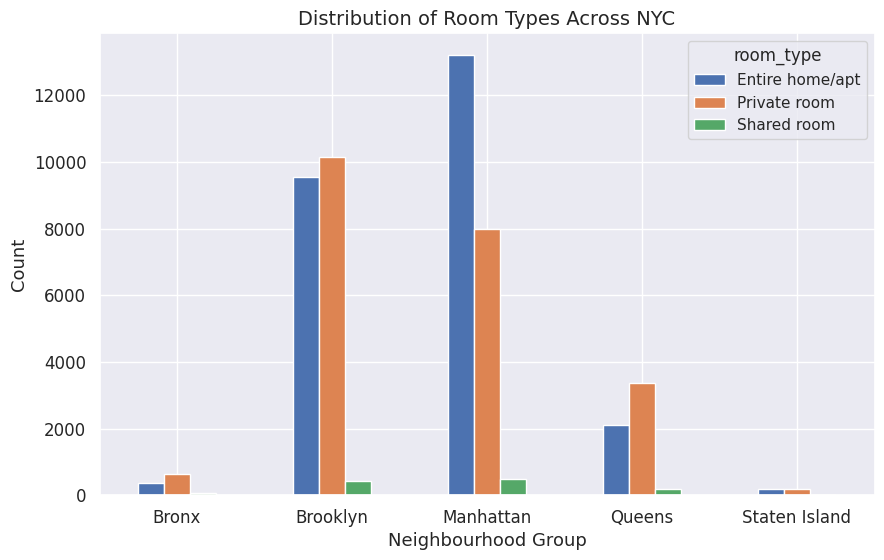

In [40]:
# Visualiztion using bar chart
room_type_distribution.plot(kind  = 'bar',figsize = (10,6))
plt.title('Distribution of Room Types Across NYC',fontsize=14)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Neighbourhood Group',fontsize=13)
plt.xticks(rotation = 0,fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

In a multiple bar graph, multiple data points for each category of data are shown with the addition of columns. Multiple bar charts are used for comparing different entities.So here, a multiple bar chart is used for the visulisation of distribution of rooms.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan has approximately 13000 Entire homes/apt, which is more than any other neighbourhood group.
* Brooklyn has the maximum number of private rooms, which is around 10,000.
* Bronx and Staten island have very few number of rooms.
* Almost all neighbourhood groups have a very small number of shared rooms when compared to other room types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights that are gained from the above chart clearly show that Entire Homes and Private room are the first preferences of customers.This information will be useful in recommending better options for accommodations in various neighbourhoods during the bookings in order to provide a better service to its clients.

#### Chart - 11

In [41]:
# Chart - 11 visualization code

# Dataframe for Total Night Spent
total_nights = airbnb.groupby('neighbourhood_group',as_index = False)['minimum_nights'].sum().sort_values(['minimum_nights'],ascending = False).reset_index(drop = True).rename(columns = {'minimum_nights':'total_nights_spent'})

# Dataframe for Minimum night spent for different room types across NYC
minnights_df = airbnb.groupby(['neighbourhood_group','room_type'],as_index = False)['minimum_nights'].sum().sort_values('minimum_nights',ascending = False).reset_index(drop = True).rename(columns = {'minimum_nights':'total_minimum_nights'})

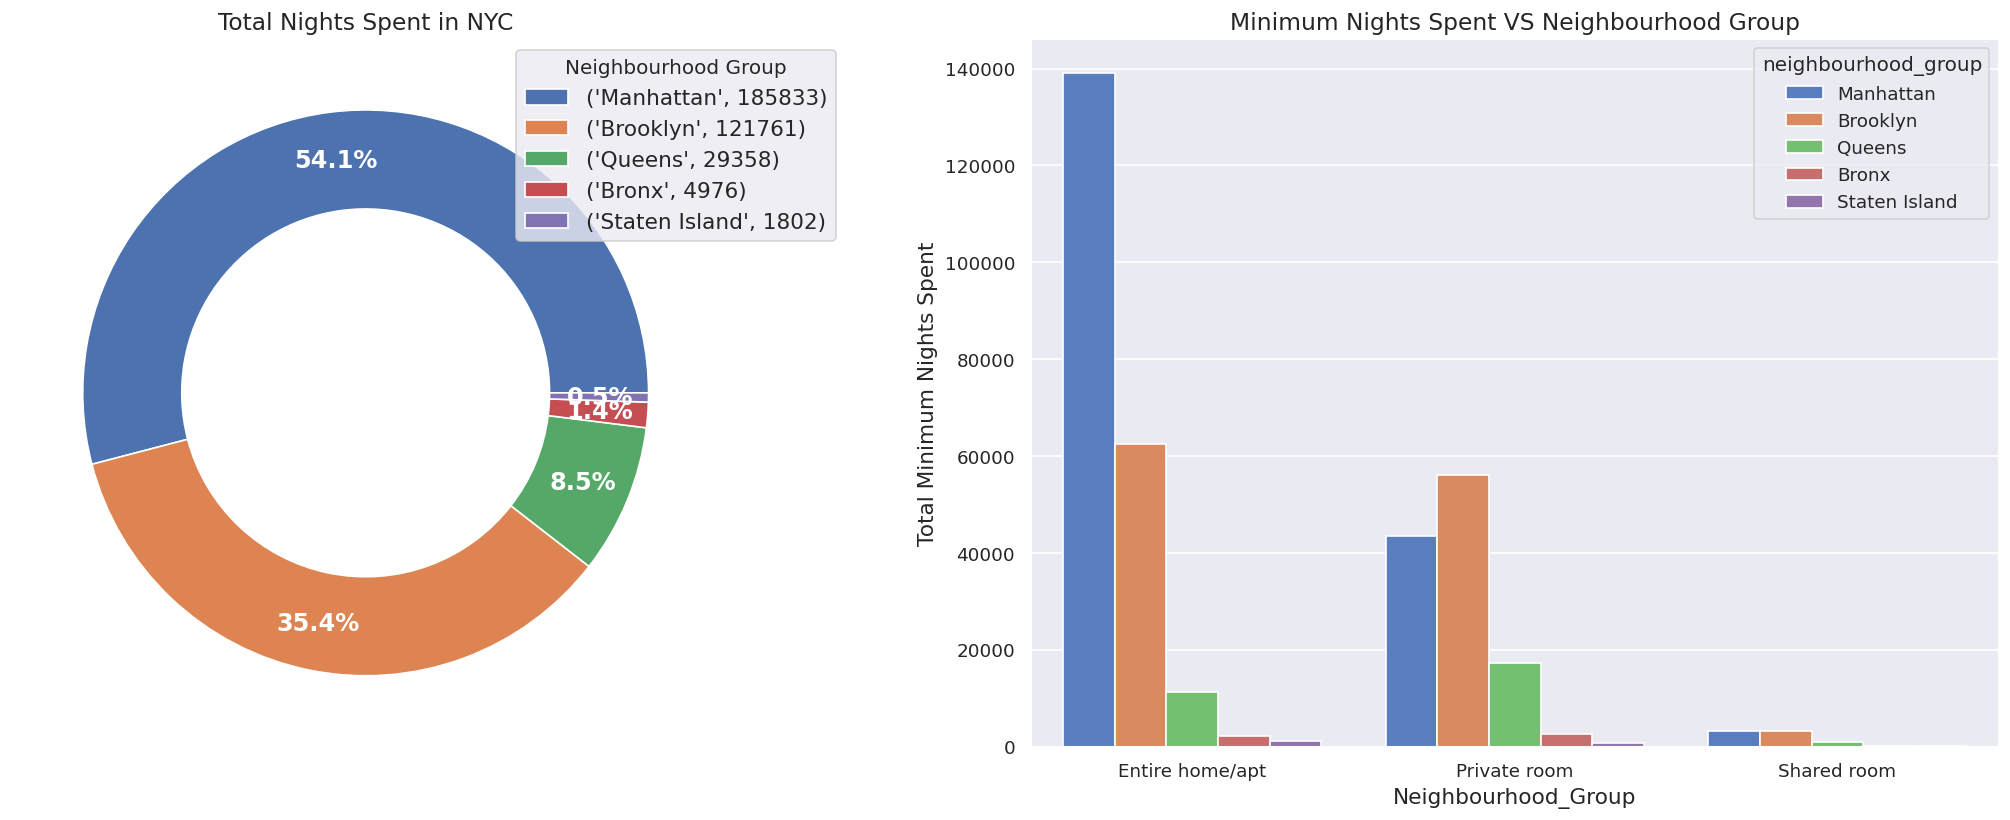

In [42]:
# Visualization

# Total Night spent at Neighbourhood group
fig,ax = plt.subplots(1,2,figsize  =(18,7),dpi = 120)
plot_labels = tuple(zip(total_nights['neighbourhood_group'],total_nights['total_nights_spent']))
wedges, texts,autotexts = ax[0].pie(total_nights['total_nights_spent'],textprops = {'size': 'large','color':"w"},wedgeprops={'width':0.35},startangle=0,autopct='%1.1f%%', pctdistance=0.83)
ax[0].legend(title='Neighbourhood Group', fontsize='13',labels = plot_labels,loc='upper right', bbox_to_anchor=(1.18, 1))
ax[0].set_title('Total Nights Spent in NYC',fontsize=14)
plt.setp(autotexts, color='white',fontweight='bold')

# Minimum night spent for different room types across NYC
sns.barplot(data = minnights_df,hue = 'neighbourhood_group', y = 'total_minimum_nights',x = 'room_type',ax = ax[1],palette = 'muted')
ax[1].set_title('Minimum Nights Spent VS Neighbourhood Group',fontsize=14)
ax[1].set_xlabel('Neighbourhood_Group',fontsize=13)
ax[1].set_ylabel('Total Minimum Nights Spent',fontsize=13)
plt.tight_layout(w_pad = 1)
plt.show()

##### 1. Why did you pick the specific chart?

* A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison by comparing the area covered in a circle with different colors. When comparing different percentages, pie charts are frequently used. So here,a pie chart is used to visualise the total nights spent in NYC.


* Secondly,a multiple bar chart is used  for the visulization of  minimum night spent in different room types because in a multiple bar graph, multiple data points for each category of data are shown with the addition of columns, and in our case we also have multiple categories.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan is most preferred for night spent. Nearly 54 percent of the total nights spent in NYC are spent at Manhattan.
* In Manhattan around 1.4 lakh nights are spent in Entire apartment.
* With 1.2 lakh total nights spent, Brooklyn ranks second on the list,and most of them are spent in Private rooms.As a result, private rooms are very popular in Brooklyn. 
* Staten Island and the Bronx are less popular places to spend the night.
* Night spent in shared rooms are similar in numbers for Manhattan and Brooklyn.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

More than 50 percent of total nights are spent in Manhattan; the reason may be because it has the most listings. We can say that the AirBnB business in Manhattan and Brooklyn is well developed, but the other neighbourhood groups are still far behind Manhattan. So these insights will be helpful in predicting upcoming bookings for spending the night in a particular area.

#### Chart - 12

#### Neighbourhoods with the Most Nights spent / The Most Popular Neighbourhood For Spending The Night.

In [43]:
# Chart - 12 visualization code

# dataframe for total night spent at each neighbourhood
df1 = airbnb.groupby('neighbourhood',as_index = False)['minimum_nights'].sum().sort_values('minimum_nights',ascending = False).rename(columns = {'minimum_nights':'total_minimum_nights'}).reset_index(drop = True)
df1[:10]

,neighbourhood,total_minimum_nights
0,Williamsburg,24415
1,Bedford-Stuyvesant,21130
2,Upper West Side,18759
3,Midtown,17792
4,Harlem,17050
5,Upper East Side,16553
6,Hell's Kitchen,15992
7,Bushwick,14456
8,East Village,11984
9,Chelsea,11159


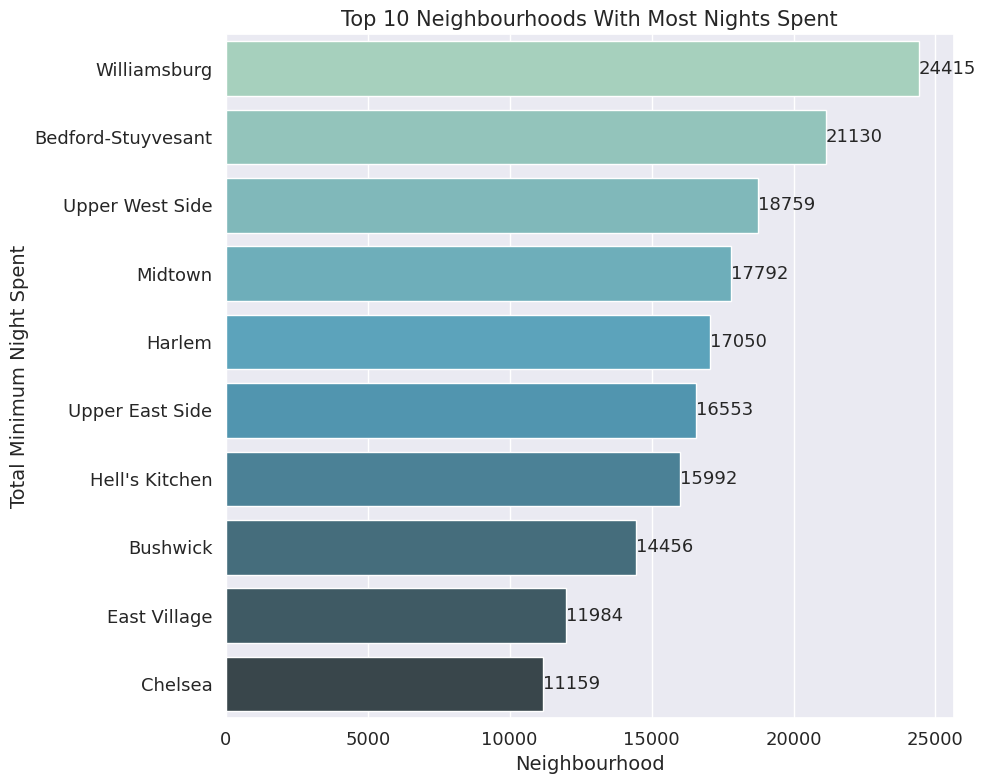

In [44]:
# Visualization

plt.figure(figsize = (10,8))
plot = sns.barplot(data = df1[:10],y = 'neighbourhood',x = 'total_minimum_nights',palette = 'GnBu_d')
plt.bar_label(plot.containers[0], label_type='edge',fontsize=13)
plt.title('Top 10 Neighbourhoods With Most Nights Spent',fontsize=15)
plt.xlabel('Neighbourhood',fontsize=14)
plt.ylabel('Total Minimum Night Spent',fontsize=14)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Here a bar chart is used because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Williamsburg and Bedford are the top two neighborhoods, which are most popular, with total nights spent around 24,500 and 21,000, respectively.

* Around 10,000 nights are spent in each of these neighbourhoods, making them all quite popular in comparison to other neighbourhoods.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information assists in the analysis of consumer preferences with regard to the area where they often spend their nights. For better business growth, it might be beneficial to concentrate more on regions with a high client concentration.

#### Chart - 13

#### Most Popular Hosts In NYC According To The Number of Reviews


In [45]:
# Chart - 13 visualization code

# Dataframe for most reviewed hosts
most_reviewed_host = airbnb.groupby(['host_id','host_name','room_type','neighbourhood_group'],as_index=False).agg({'number_of_reviews':'sum'}).sort_values(['number_of_reviews'],ascending = False).reset_index(drop=True).rename(columns = {'number_of_reviews':'total_number_of_reviews'})
most_reviewed_host[0:10]

,host_id,host_name,room_type,neighbourhood_group,total_number_of_reviews
0,37312959,Maya,Private room,Queens,2273
1,344035,Brooklyn& Breakfast -Len-,Private room,Brooklyn,2205
2,35524316,Yasu & Akiko,Private room,Manhattan,1837
3,40176101,Brady,Private room,Brooklyn,1818
4,4734398,Jj,Private room,Manhattan,1798
5,26432133,Danielle,Private room,Queens,1793
6,16677326,Alex And Zeena,Private room,Manhattan,1355
7,6885157,Randy,Private room,Brooklyn,1323
8,23591164,Angela,Private room,Queens,1269
9,59529529,Han,Private room,Manhattan,1229


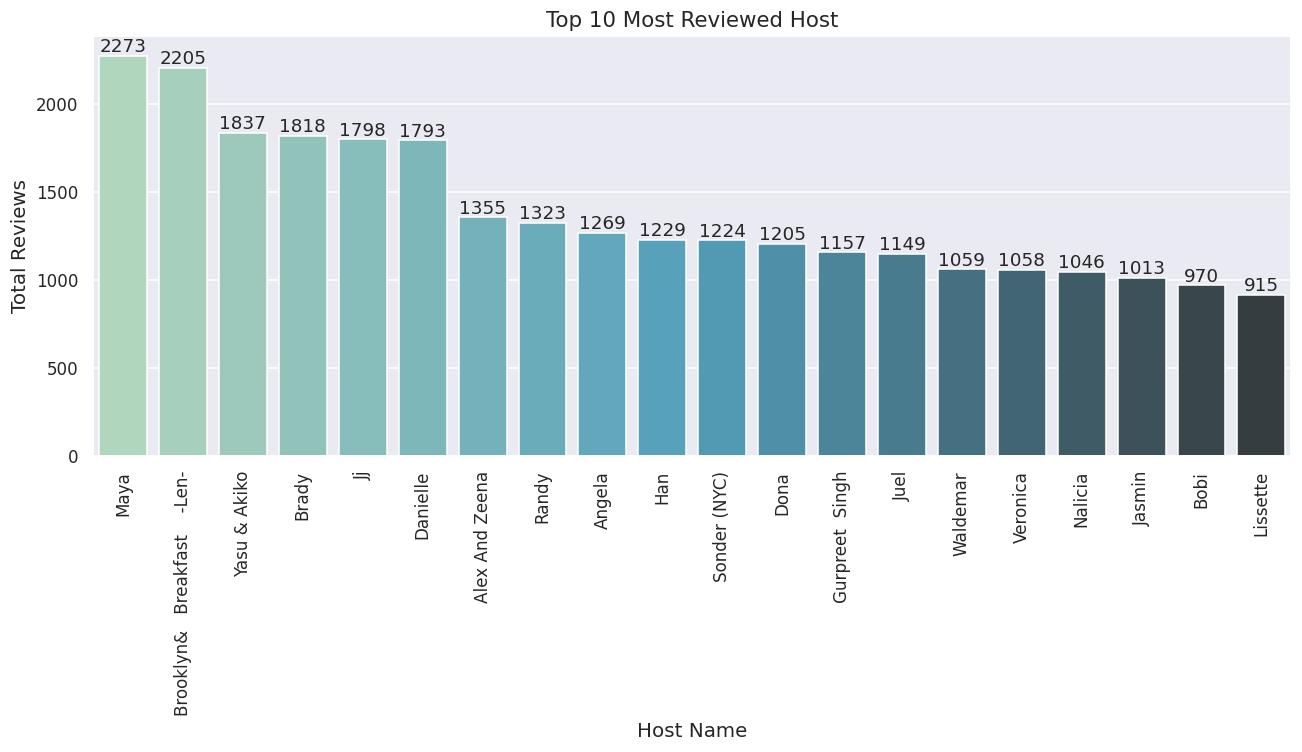

In [46]:
# Visulization
plt.figure(figsize = (12,7),dpi = 110)
plot = sns.barplot(data = most_reviewed_host[:20],x = 'host_name',y = 'total_number_of_reviews',palette = 'GnBu_d')
plt.title('Top 10 Most Reviewed Host',fontsize=14)
plt.bar_label(plot.containers[0], label_type='edge')
plt.ylabel('Total Reviews',fontsize=13)
plt.xlabel('Host Name',fontsize=13)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.That's why bar chart is used to show the most reviewed host.

##### 2. What is/are the insight(s) found from the chart?

* Maya is the most reviewed host with over 2200 reviews.
* All of the most popular hosts have private rooms. 
* All these hosts belong to Manhattan, Brooklyn and Queens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights help in determining the quality of service based on positive reviews, and based on that, necessary steps can be taken to improve AirBnB service in different areas. Based on previous reviews, a customer can decide whether to book a particular accommodation or not.

#### Chart - 14 - Correlation Heatmap

In [47]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [48]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***